Using TensorFlow backend.


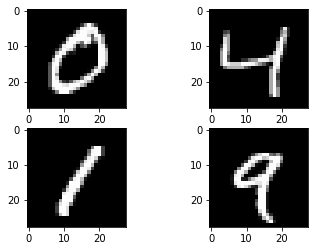

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot first 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

4


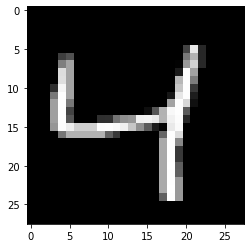

In [2]:
image_index = 2
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
# save input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#Adding convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Drop out 25% of the units to avoid overfitting
model.add(Dropout(0.25))

#Convert into 1-D array
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [5]:
batch_size = 128
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 809us/step - loss: 0.2273 - accuracy: 0.9301 - val_loss: 0.0495 - val_accuracy: 0.9835
Epoch 2/10
60000/60000 [==============================] - 50s 827us/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 49s 815us/step - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0345 - val_accuracy: 0.9884
Epoch 4/10
60000/60000 [==============================] - 48s 799us/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0333 - val_accuracy: 0.9899
Epoch 5/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 49s 820us/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] 